# Stein's Paradox

[Stein's paradox](https://en.wikipedia.org/wiki/Stein%27s_example)

We will compare the risk of [James–Stein estimator](https://en.wikipedia.org/wiki/James%E2%80%93Stein_estimator) to a naive estimator on a simulated high-dimensional dataset.

In [ ]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

We have a single data point $x$ drawn from a $d$-dimensional multivariate normal distribution with mean vector $\theta$ and covariance matrix $I_d$ (the $d\times d$ identity matrix).

$X \sim \mathcal{N}(\theta, I_d)$

We want to obtain an estimate $\hat{\theta}$ of $\theta$ by using only $x$.

We will compare different estimators $\hat{\theta}(x)$ using their "risk", which is basically their mean squared error across trials.

The simplest estimator is $\hat{\theta}(x) = x$. We will call this the naive estimator.

In [ ]:
def est_naive(x):
    return x

Stein's paradox suggests that we can come up with an alternative estimator that has lower risk: $\hat{\theta}(x) = \left(1 - \frac{d - 2}{||x||_2^2}\right) \times x$. We can think of this as shrinking our estimate $\hat{\theta}$ towards zero, tuning the strength of the shrinkage we apply by estimating something directly from our single data point (namely, it's Euclidean norm).

In [ ]:
def est_stein(x):
    return (1 - (x.shape[1] - 2)/np.linalg.norm(x, axis=1)**2)[:, None] * x

We define a function to estimate the risk of an estimator at a particular true value of $\theta$ by averaging the mean squared error of the estimator over $m$ trials.

In [ ]:
def mean_risk(est, theta, m=int(1e6)):
    rvs = stats.multivariate_normal(theta, 1).rvs(m)
    ests = est(rvs)
    rs = np.linalg.norm((ests - theta), axis=1)**2
    return np.mean(rs)

We now evaluate the mean risk for various choices of $\theta$. For simplicity, we just try a sequence of $\theta$'s whose components are all equal and take integer values between 0 and 10 inclusive.

In [ ]:
d = 10
naive_risk = [mean_risk(est_naive, [t] * d) for t in range(11)]
stein_risk = [mean_risk(est_stein, [t] * d) for t in range(11)]

We can then plot the mean risk.

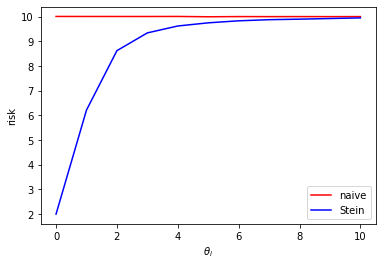

In [ ]:
plt.plot(np.arange(len(naive_risk)), naive_risk, label='naive', color='r')
plt.plot(np.arange(len(stein_risk)), stein_risk, label='Stein', color='b')
plt.xlabel(r'$\theta_i$')
plt.ylabel('risk')
plt.legend()
plt.show()

We can see that when the true $\theta$ is close to the zero vector, the Stein estimator has a much lower risk than the naive estimator. This is what we expect to happen if we think of the Stein estimator as performing some kind of Bayesian shrinkage towards a prior distribution over $\theta$ which happens to match the true $\theta$ reasonably well. We could imagine that some property like this might also hold for 1 or 2 dimensions. What is perhaps more surprising is that the Stein estimator has lower risk than the naive estimator even when the true $\theta$ is far from the zero vector (the Stein estimator appears to asymptotically approach the risk of the naive estimator from below as the distance between the true $\theta$ and the zero vector goes to infinity). This suggests that even when the choice of a Bayesian prior is arbitrarily "wrong" in the sense that it is centered very far from the true value of the parameter, it is still better to apply the shrinkage (as long as we are in high-dimensional space, $d \geq 3$).